### Student Information
Name: 林威盛

Student ID: 111062201

GitHub ID: jason34105533

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

In [1]:
# Starts the work
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import math
import helpers.data_mining_helpers as dmh

[nltk_data] Downloading package punkt to /home/jason/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
FILE = "./newdataset/Reddit-stock-sentiment.csv"

# Read the dataset
df = pd.read_csv(FILE)
df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [3]:
df.shape

(847, 16)

In [4]:
df['text'][0]

'Calls on retards'

### Simplified DataSet

In [5]:
# Get simplfied dataframe
X = df[['text', 'subreddit', 'sentiment', 'title']]
X.head(10)

,text,subreddit,sentiment,title
0,Calls on retards,wallstreetbets,-1.0,Retardation is on the menu boys! WSB is so back
1,Stunt as in like why did they even make a big ...,wallstreetbets,1.0,Retail giant TARGET has now declined for 10 co...
2,Seeing lots of red in the ticker.,StockMarket,0.0,How do you feel about a sitting president maki...
3,Vision Marine Technologies Inc. is rewriting t...,stockstobuytoday,1.0,Who knows more? $VMAR
4,He didn’t say thank you.,StockMarket,0.0,The Trump administration is begging Xi Jinping...
5,"Hoping to ejaculate in wet warm puss tonight, ...",wallstreetbets,1.0,Weekend Discussion Thread for the Weekend of A...
6,Trump will respond to china increasing their t...,stocks,-1.0,Is the market in complete denial right now?
7,Confirmed not a trap. Its been like this for p...,wallstreetbets,1.0,Retardation is on the menu boys! WSB is so back
8,Am I the only one seeing the cup & handle brea...,stocks,1.0,"It's fucking awful seeing the ""Silver"" misinfo..."
9,HLGN is $10. Hurry and catch it now before it ...,stockstobuytoday,0.0,Any cheap stocks under $10?


### Sentiment Distribution by Subreddit

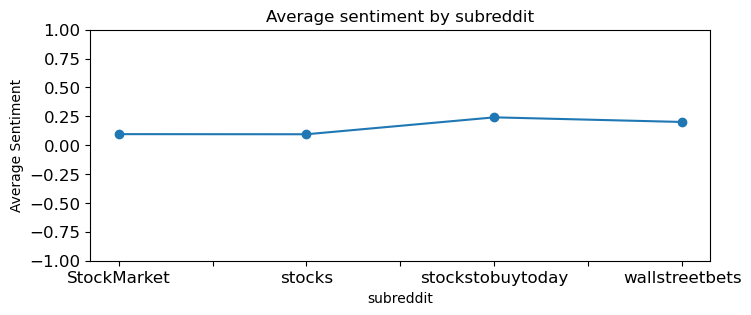

In [6]:
# Plot the Average 'sentiment' distribution over the different 'subreddit's
import matplotlib.pyplot as plt

# Plot the Average 'sentiment' distribution over the different 'subreddit's
X.groupby('subreddit')['sentiment'].mean().plot(kind='line',
                                               title='Average sentiment by subreddit',
                                               ylim=[-1, 1], 
                                               marker='o', fontsize=12, figsize=(8,3))
plt.ylabel('Average Sentiment')
plt.show()

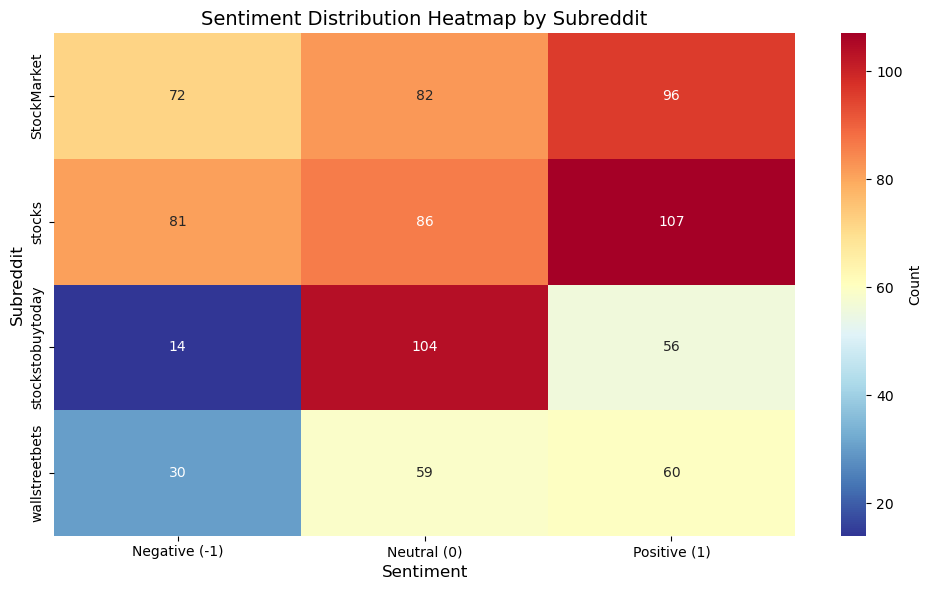

In [7]:
import seaborn as sns

# A Sentiment Distribution Heatmap using matplotlib and seaborn
import matplotlib.pyplot as plt

# Create a pivot table for the heatmap
# Count occurrences of each sentiment for each subreddit
heatmap_data = X.groupby(['subreddit', 'sentiment']).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, 
            annot=True, 
            fmt='d', 
            cmap='RdYlBu_r',
            cbar_kws={'label': 'Count'},
            xticklabels=['Negative (-1)', 'Neutral (0)', 'Positive (1)'],
            yticklabels=heatmap_data.index)

plt.title('Sentiment Distribution Heatmap by Subreddit', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Subreddit', fontsize=12)
plt.tight_layout()
plt.show()

### Overall Sentiment Distribution with Radar Chart

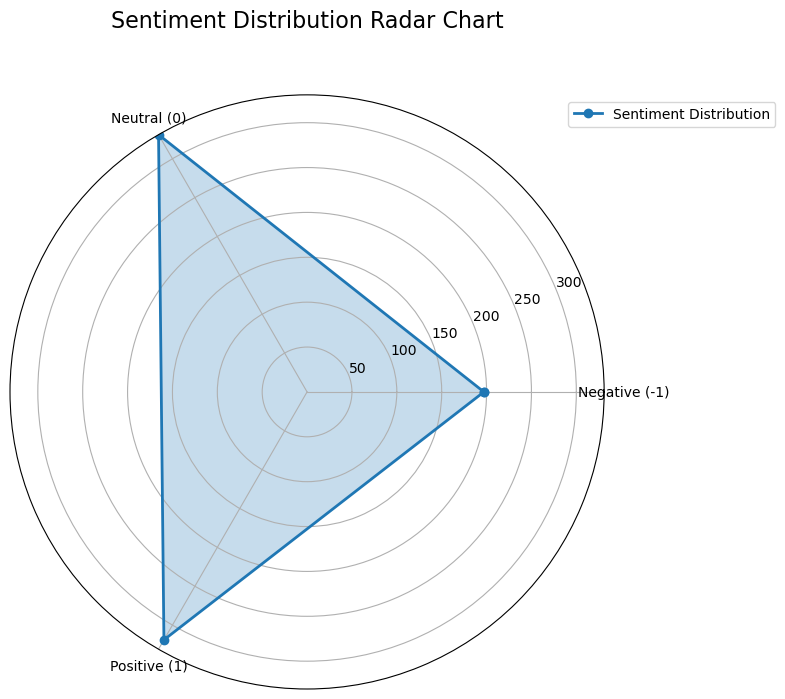

,Sentiment,Count
0,-1.0,197
1,0.0,331
2,1.0,319


In [8]:
import numpy as np

# Create a radar chart for sentiment distribution using matplotlib
import matplotlib.pyplot as plt

# Count sentiment values
sentiment_counts = X['sentiment'].value_counts().sort_index()

# Create radar chart with matplotlib
categories = ['Negative (-1)', 'Neutral (0)', 'Positive (1)']
values = sentiment_counts.values

# Number of categories
N = len(categories)

# Compute angle for each category
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Complete the circle

# Add the first value to the end to close the radar chart
values = np.concatenate((values, [values[0]]))

# Create the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
ax.plot(angles, values, 'o-', linewidth=2, label='Sentiment Distribution')
ax.fill(angles, values, alpha=0.25)

# Add category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Set y-axis limits
ax.set_ylim(0, sentiment_counts.max())

# Add title and legend
plt.title("Sentiment Distribution Radar Chart", size=16, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()

# Print out a table of the sentiment distribution
sentiment_distribution = X['sentiment'].value_counts().sort_index()
sentiment_distribution_df = pd.DataFrame(sentiment_distribution).reset_index()
sentiment_distribution_df.columns = ['Sentiment', 'Count']
sentiment_distribution_df

### Frequency Words in Text

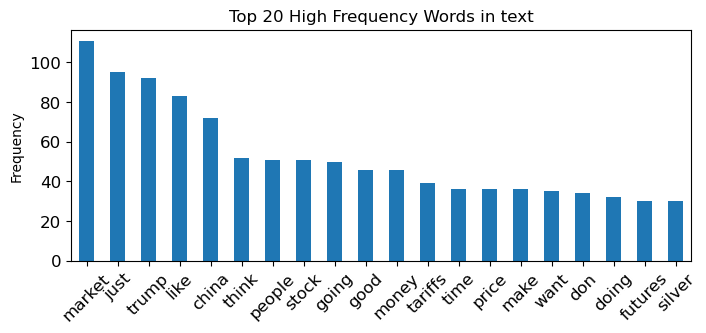

In [9]:
# Frequency word bar chart

# Get the top 20 high frequency words
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X_vectorized = vectorizer.fit_transform(X['text'])
X_vectorized_df = pd.DataFrame(X_vectorized.toarray(), columns=vectorizer.get_feature_names_out())
X_vectorized_df.head()
X_vectorized_df.sum().sort_values(ascending=False).plot(kind='bar', figsize=(8,3), 
                                                       title="Top 20 High Frequency Words in text", rot=45, fontsize=12)
plt.ylabel('Frequency')
plt.show()

#### Hot Titles

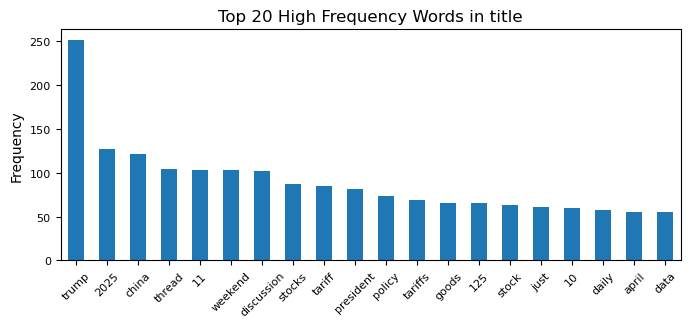

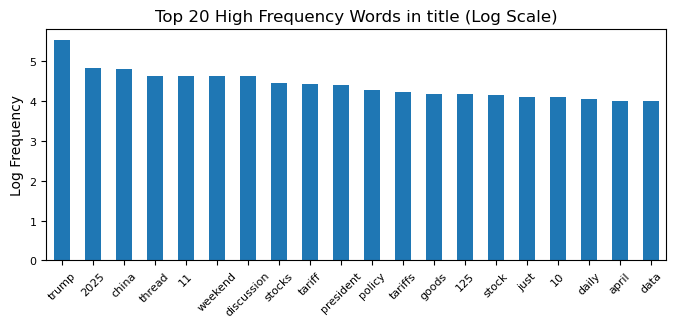

In [10]:
# Top 10 high frequency words for a title

vectorizer_title = CountVectorizer(stop_words='english', max_features=20)
X_vectorized_title = vectorizer_title.fit_transform(X['title'])
X_vectorized_title_df = pd.DataFrame(X_vectorized_title.toarray(), columns=vectorizer_title.get_feature_names_out())
X_vectorized_title_df.head()
X_vectorized_title_df.sum().sort_values(ascending=False).plot(kind='bar', figsize=(8,3), 
                                                           title="Top 20 High Frequency Words in title", rot=45, fontsize=8)
plt.ylabel('Frequency')
plt.show()


# Frequency in log scale
X_vectorized_title_df.sum().sort_values(ascending=False).apply(lambda x: math.log(x)).plot(kind='bar', figsize=(8,3), 
                                                       title="Top 20 High Frequency Words in title (Log Scale)", rot=45, fontsize=8)
plt.ylabel('Log Frequency')
plt.show()

### Heatmap of Word Frequency in Text

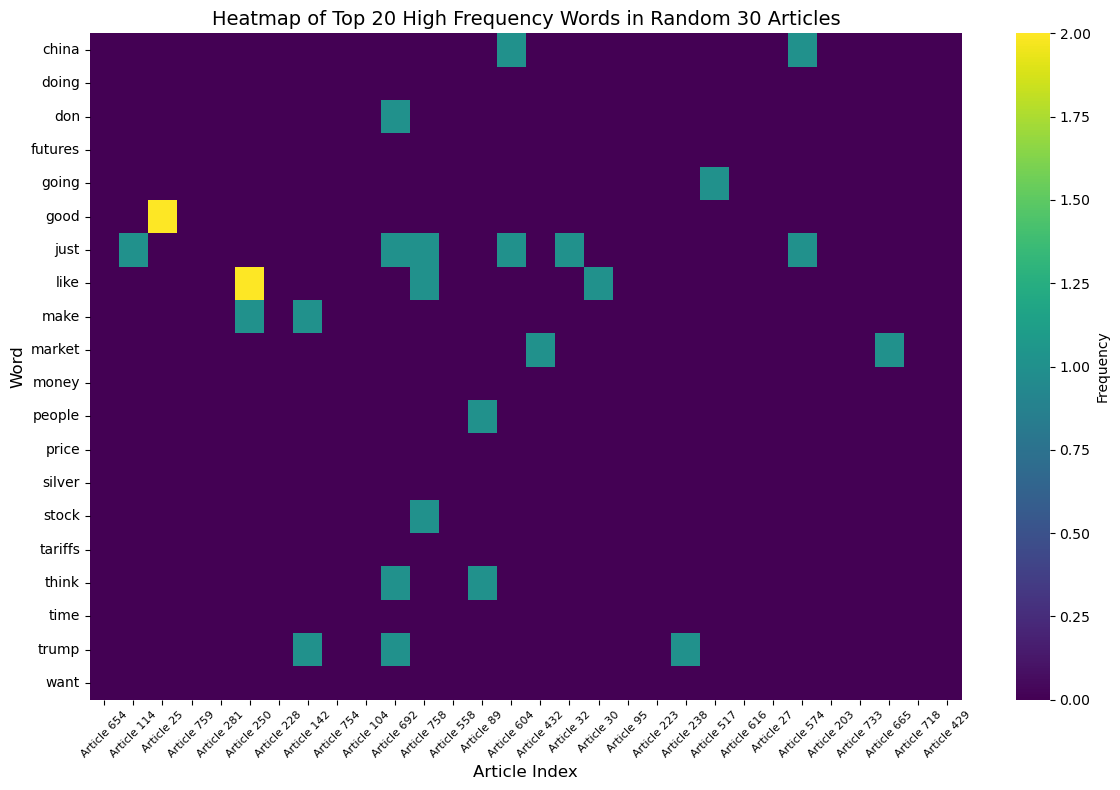

In [11]:
# Heat map of random 30 articles and their top 20 high frequency words
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Set random seed for reproducibility
random.seed(42)
random_indices = random.sample(range(X_vectorized_df.shape[0]), 30)

# Create the heatmap data
heatmap_data = X_vectorized_df.iloc[random_indices].T

# Create matplotlib heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, 
            cmap='viridis',
            cbar_kws={'label': 'Frequency'},
            xticklabels=[f"Article {idx}" for idx in random_indices],
            yticklabels=X_vectorized_df.columns)

plt.title("Heatmap of Top 20 High Frequency Words in Random 30 Articles", fontsize=14)
plt.xlabel("Article Index", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### WordCloud Visualization

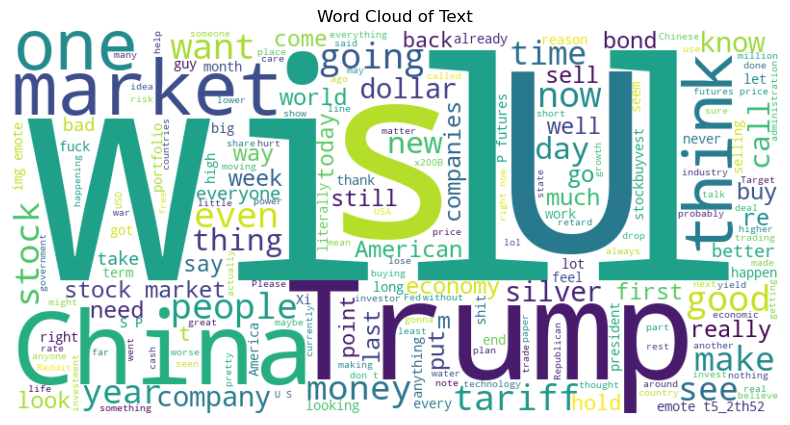

In [12]:
# Umm I couldn't draw Word Cloud by helpers function from TAs, since it returns 'no module named plotly.plotly'.

import matplotlib.pyplot as plt
from wordcloud import WordCloud


Whole_Content = ' '.join(X['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(Whole_Content)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text')
plt.show()


### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 2

In [13]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dataclasses import dataclass
from typing import List, Tuple
import re
from collections import defaultdict

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.sparse import hstack
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

UMAP_AVAILABLE = False

In [14]:
@dataclass
class ModelResult:
    """Store model evaluation results"""
    name: str
    accuracy: float
    f1_macro: float
    predictions: np.ndarray

In [15]:
class TextPreprocessor:
    """Handles text cleaning and tokenization with stemming instead of lemmatization"""
    
    def __init__(self, use_stemming=True):
        self.stopwords = set(stopwords.words('english'))
        self.stemmer = PorterStemmer() if use_stemming else None
        
    def clean(self, text: str) -> str:
        """Clean raw text"""
        text = text.lower()
        text = re.sub(r'http[s]?://\S+|www\.\S+', '', text)
        text = re.sub(r'[@#]\w+', '', text)
        text = re.sub(r'\d+', 'NUM', text)  # Replace numbers with token
        text = re.sub(r'[^a-z\s]', ' ', text)
        return ' '.join(text.split())
    
    def tokenize(self, text: str) -> List[str]:
        """Tokenize and optionally stem"""
        tokens = [t for t in text.split() if len(t) > 2 and t not in self.stopwords]
        if self.stemmer:
            tokens = [self.stemmer.stem(t) for t in tokens]
        return tokens
    
    def process(self, texts: pd.Series) -> Tuple[pd.Series, pd.Series]:
        """Process entire series"""
        cleaned = texts.apply(self.clean)
        tokens = cleaned.apply(self.tokenize)
        rejoined = tokens.apply(' '.join)
        return tokens, rejoined

In [16]:
class PatternMiner:
    """Extract frequent patterns using FP-Growth algorithm"""
    
    def __init__(self, vocab_size=250, min_support=0.04, pattern_limit=150):
        self.vocab_size = vocab_size
        self.min_support = min_support
        self.pattern_limit = pattern_limit
        self.patterns = []
        
    def fit(self, token_series: pd.Series):
        """Find frequent patterns in tokens"""
        # Build vocabulary from most common words
        word_freq = defaultdict(int)
        for tokens in token_series:
            for word in set(tokens):
                word_freq[word] += 1
        
        vocab = sorted(word_freq, key=word_freq.get, reverse=True)[:self.vocab_size]
        vocab_set = set(vocab)
        
        # Create transactions
        transactions = [[w for w in tokens if w in vocab_set] for tokens in token_series]
        
        # Encode and mine patterns
        encoder = TransactionEncoder()
        encoded = encoder.fit(transactions).transform(transactions, sparse=True)
        df_encoded = pd.DataFrame.sparse.from_spmatrix(encoded, columns=encoder.columns_)
        df_encoded = df_encoded.loc[:, df_encoded.sum() > 0]
        
        # Use FP-Growth instead of Apriori
        itemsets = fpgrowth(df_encoded.astype(bool), 
                           min_support=self.min_support, 
                           use_colnames=True)
        
        # Filter patterns
        itemsets['size'] = itemsets['itemsets'].apply(len)
        valid = itemsets[itemsets['size'].between(2, 4)]  # 2-4 word patterns
        
        self.patterns = [
            tuple(sorted(s)) for s in 
            valid.nlargest(self.pattern_limit, 'support')['itemsets']
        ]
        
        print(f"Mined {len(self.patterns)} patterns from {len(itemsets)} total itemsets")
        return self
    
    def transform(self, token_series: pd.Series) -> np.ndarray:
        """Transform tokens to pattern features"""
        n_samples = len(token_series)
        n_patterns = len(self.patterns)
        matrix = np.zeros((n_samples, n_patterns), dtype=np.int8)
        
        for i, tokens in enumerate(token_series):
            token_set = set(tokens)
            for j, pattern in enumerate(self.patterns):
                if set(pattern).issubset(token_set):
                    matrix[i, j] = 1
                    
        return matrix

In [17]:
class SentimentClassifier:
    """Main classification pipeline"""
    
    def __init__(self, random_state=42):
        self.rs = random_state
        self.preprocessor = TextPreprocessor(use_stemming=True)
        self.pattern_miner = PatternMiner()
        self.models = {}
        self.results = []
        self.tdm_df = None
        self.pattern_df = None
        
    def load_data(self, filepath: str):
        """Load and prepare dataset"""
        df = pd.read_csv(filepath)[['text', 'label']].dropna()
        
        # Filter and encode labels
        self.label_map = {-1.0: 0, 0.0: 1, 1.0: 2}
        self.label_names = ['negative', 'neutral', 'positive']
        
        df = df[df['label'].isin(self.label_map.keys())].copy()
        df['label_idx'] = df['label'].map(self.label_map)
        
        print(f"Loaded {len(df)} samples")
        print(f"Label distribution:\n{df['label'].value_counts().sort_index()}\n")
        
        return df
    
    def prepare_features(self, df: pd.DataFrame):
        """Split and prepare all feature sets"""
        # Split data
        splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=self.rs)
        train_idx, test_idx = next(splitter.split(df, df['label_idx']))
        
        self.train_df = df.iloc[train_idx].copy()
        self.test_df = df.iloc[test_idx].copy()
        
        # Preprocess
        train_tokens, train_text = self.preprocessor.process(self.train_df['text'])
        test_tokens, test_text = self.preprocessor.process(self.test_df['text'])
        
        self.train_df['tokens'] = train_tokens
        self.train_df['clean_text'] = train_text
        self.test_df['tokens'] = test_tokens
        self.test_df['clean_text'] = test_text
        
        # Extract labels
        self.y_train = self.train_df['label_idx'].values
        self.y_test = self.test_df['label_idx'].values
        
        # Build feature matrices
        print("Building feature matrices...")
        
        # 1. Character n-grams (alternative approach)
        char_vec = TfidfVectorizer(analyzer='char', ngram_range=(3, 5), max_features=2000)
        self.X_char_train = char_vec.fit_transform(self.train_df['clean_text'])
        self.X_char_test = char_vec.transform(self.test_df['clean_text'])
        
        # 2. Word-level TF-IDF with trigrams
        word_vec = TfidfVectorizer(ngram_range=(1, 3), max_features=2500, min_df=3)
        self.X_word_train = word_vec.fit_transform(self.train_df['clean_text'])
        self.X_word_test = word_vec.transform(self.test_df['clean_text'])
        
        # 3. Term-Document Matrix for analysis
        count_vec = CountVectorizer(max_features=1000, min_df=5)
        X_tdm_train = count_vec.fit_transform(self.train_df['clean_text'])
        self.tdm_df = pd.DataFrame(X_tdm_train.toarray(), 
                                   columns=count_vec.get_feature_names_out(),
                                   index=self.train_df.index)
        
        # 4. Pattern features
        self.pattern_miner.fit(self.train_df['tokens'])
        self.X_pat_train = self.pattern_miner.transform(self.train_df['tokens'])
        self.X_pat_test = self.pattern_miner.transform(self.test_df['tokens'])
        
        # Create pattern matrix DataFrame
        pattern_names = [' '.join(p) for p in self.pattern_miner.patterns]
        self.pattern_df = pd.DataFrame(self.X_pat_train, 
                                       columns=pattern_names,
                                       index=self.train_df.index)
        
        # 5. Hybrid: Word + Patterns
        self.X_hybrid_train = hstack([self.X_word_train, self.X_pat_train])
        self.X_hybrid_test = hstack([self.X_word_test, self.X_pat_test])
        
        print(f"Char n-grams: {self.X_char_train.shape}")
        print(f"Word n-grams: {self.X_word_train.shape}")
        print(f"Term-Document Matrix: {self.tdm_df.shape}")
        print(f"Patterns: {self.X_pat_train.shape}")
        print(f"Hybrid: {self.X_hybrid_train.shape}\n")
        
    def train_models(self):
        """Train multiple model configurations"""
        configs = [
            ("Char-TF-IDF + MNB", MultinomialNB(alpha=0.1), 
             self.X_char_train, self.X_char_test),
            ("Word-TF-IDF + BernoulliNB", BernoulliNB(alpha=0.5), 
             self.X_word_train, self.X_word_test),
            ("Hybrid + MNB", MultinomialNB(alpha=0.5), 
             self.X_hybrid_train, self.X_hybrid_test),
        ]
        
        for name, model, X_train, X_test in configs:
            print(f"Training {name}...")
            model.fit(X_train, self.y_train)
            predictions = model.predict(X_test)
            
            acc = accuracy_score(self.y_test, predictions)
            f1 = f1_score(self.y_test, predictions, average='macro')
            
            result = ModelResult(name, acc, f1, predictions)
            self.results.append(result)
            
            print(f"  Accuracy: {acc:.4f}, F1-Macro: {f1:.4f}")
            print(classification_report(self.y_test, predictions, 
                                       target_names=self.label_names, digits=4))
            print()
            
    def visualize_results(self):
        """Create comprehensive visualizations"""
        # 1. Performance comparison and confusion matrices
        fig, axes = plt.subplots(1, 4, figsize=(20, 5))
        
        # Metrics comparison
        ax1 = axes[0]
        models = [r.name for r in self.results]
        accuracies = [r.accuracy for r in self.results]
        f1_scores = [r.f1_macro for r in self.results]
        
        x = np.arange(len(models))
        width = 0.35
        
        bars1 = ax1.bar(x - width/2, accuracies, width, label='Accuracy', color='#3498db', alpha=0.8)
        bars2 = ax1.bar(x + width/2, f1_scores, width, label='F1-Macro', color='#e74c3c', alpha=0.8)
        
        ax1.set_ylabel('Score')
        ax1.set_title('Model Performance Metrics')
        ax1.set_xticks(x)
        ax1.set_xticklabels(models, rotation=15, ha='right')
        ax1.legend()
        ax1.set_ylim(0, 1)
        ax1.grid(axis='y', alpha=0.3)
        
        # Add value labels
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                ax1.text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.3f}', ha='center', va='bottom', fontsize=8)
        
        # 2. Confusion matrices
        for idx, result in enumerate(self.results):
            ax = axes[idx + 1]
            cm = confusion_matrix(self.y_test, result.predictions)
            
            # Normalized confusion matrix
            cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            
            sns.heatmap(cm_norm, annot=cm, fmt='d', cmap='RdYlGn', ax=ax,
                       xticklabels=self.label_names, yticklabels=self.label_names,
                       cbar_kws={'label': 'Normalized Count'})
            ax.set_title(f'{result.name}\nAcc: {result.accuracy:.3f}')
            ax.set_ylabel('Actual')
            ax.set_xlabel('Predicted')
        
        plt.tight_layout()
        plt.show()
    
    def analyze_document_frequency(self):
        """Analyze and visualize document frequency statistics"""
        print("\nDocument Frequency Analysis...")
        
        # Calculate document frequencies
        doc_freq = (self.tdm_df > 0).sum(axis=0).sort_values(ascending=False)
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Top terms by document frequency
        ax = axes[0, 0]
        top_terms = doc_freq.head(20)
        top_terms.sort_values().plot(kind='barh', ax=ax, color='steelblue')
        ax.set_xlabel('Document Frequency')
        ax.set_title('Top 20 Terms by Document Frequency')
        ax.grid(axis='x', alpha=0.3)
        
        # 2. Document frequency distribution
        ax = axes[0, 1]
        ax.hist(doc_freq.values, bins=50, color='coral', alpha=0.7, edgecolor='black')
        ax.set_xlabel('Document Frequency')
        ax.set_ylabel('Number of Terms')
        ax.set_title('Distribution of Document Frequencies')
        ax.set_yscale('log')
        ax.grid(axis='y', alpha=0.3)
        
        
        # 4. Term frequency vs document frequency scatter
        ax = axes[1, 1]
        term_freq = self.tdm_df.sum(axis=0)
        doc_freq_all = (self.tdm_df > 0).sum(axis=0)
        
        ax.scatter(doc_freq_all, term_freq, alpha=0.5, s=20, color='purple')
        ax.set_xlabel('Document Frequency')
        ax.set_ylabel('Term Frequency')
        ax.set_title('Term Frequency vs Document Frequency')
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.grid(True, alpha=0.3)
        
        # Annotate some interesting points
        # High TF, low DF (specific terms)
        if len(term_freq) > 0 and len(doc_freq_all) > 0:
            tf_df_ratio = term_freq / (doc_freq_all + 1)
            interesting_terms = tf_df_ratio.nlargest(5).index
            for term in interesting_terms:
                if term in doc_freq_all.index and term in term_freq.index:
                    ax.annotate(term, 
                               (doc_freq_all[term], term_freq[term]),
                               fontsize=8, alpha=0.7)
        
        plt.tight_layout()
        plt.show()
        
        # Print statistics
        print(f"\nDocument Frequency Statistics:")
        print(f"  Total unique terms: {len(doc_freq)}")
        print(f"  Mean doc frequency: {doc_freq.mean():.2f}")
        print(f"  Median doc frequency: {doc_freq.median():.2f}")
        print(f"  Terms appearing in >50% docs: {(doc_freq > len(self.tdm_df) * 0.5).sum()}")
        print(f"  Terms appearing in <5 docs: {(doc_freq < 5).sum()}")
        
        if self.pattern_df is not None and len(self.pattern_df.columns) > 0:
            print(f"  Total patterns found: {len(self.pattern_df.columns)}")
        else:
            print(f"  Total patterns found: 0")
        
    def visualize_dimensionality_reduction(self):
        """Apply and visualize PCA, t-SNE, and UMAP on term-document matrix"""
        print("\nApplying Dimensionality Reduction (this may take a while)...")
        
        # Sample if dataset is too large for t-SNE
        max_samples = 2000
        if len(self.tdm_df) > max_samples:
            print(f"  Sampling {max_samples} documents for visualization...")
            sample_idx = np.random.RandomState(self.rs).choice(
                len(self.tdm_df), max_samples, replace=False
            )
            X_vis = self.tdm_df.values[sample_idx]
            y_vis = self.y_train[sample_idx]
        else:
            X_vis = self.tdm_df.values
            y_vis = self.y_train
        
        # Apply dimensionality reduction
        print("  Computing PCA...")
        X_pca = PCA(n_components=2, random_state=self.rs).fit_transform(X_vis)
        
        print("  Computing t-SNE...")
        X_tsne = TSNE(n_components=2, random_state=self.rs, perplexity=30).fit_transform(X_vis)
        
        if UMAP_AVAILABLE:
            print("  Computing UMAP...")
            X_umap = umap.UMAP(n_components=2, random_state=self.rs).fit_transform(X_vis)
            n_plots = 3
        else:
            print("  Skipping UMAP (not installed)")
            n_plots = 2
            X_umap = None
        
        # Create figure with subplots
        fig, axes = plt.subplots(1, n_plots, figsize=(10 * n_plots, 8))
        if n_plots == 2:
            axes = [axes[0], axes[1]]
        fig.suptitle('Dimensionality Reduction Comparison on Term-Document Matrix', 
                     fontsize=18, fontweight='bold')
        
        # Color map for labels
        colors = ['coral', 'blue', 'orange']
        
        # Helper function to create scatter plots
        def plot_scatter(ax, X_reduced, title):
            for label_idx, (label_name, color) in enumerate(zip(self.label_names, colors)):
                mask = y_vis == label_idx
                xs = X_reduced[mask, 0]
                ys = X_reduced[mask, 1]
                ax.scatter(xs, ys, c=color, marker='o', label=label_name, 
                          alpha=0.6, s=40, edgecolors='black', linewidth=0.5)
            
            ax.grid(color='gray', linestyle=':', linewidth=1.5, alpha=0.3)
            ax.set_title(title, fontsize=14, fontweight='bold')
            ax.set_xlabel('Dimension 1', fontsize=12)
            ax.set_ylabel('Dimension 2', fontsize=12)
            ax.legend(loc='upper right', framealpha=0.9, fontsize=11)
        
        # Create scatter plots for each method
        plot_scatter(axes[0], X_pca, 'PCA')
        plot_scatter(axes[1], X_tsne, 't-SNE')
        
        if UMAP_AVAILABLE:
            plot_scatter(axes[2], X_umap, 'UMAP')
        
        plt.tight_layout()
        plt.show()
        
        # PCA explained variance analysis
        pca_full = PCA(n_components=min(50, X_vis.shape[1]))
        pca_full.fit(X_vis)
        
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Explained variance
        ax = axes[0]
        ax.plot(range(1, len(pca_full.explained_variance_ratio_) + 1),
               pca_full.explained_variance_ratio_, 'o-', color='steelblue', linewidth=2, markersize=6)
        ax.set_xlabel('Principal Component', fontsize=12)
        ax.set_ylabel('Explained Variance Ratio', fontsize=12)
        ax.set_title('PCA Explained Variance by Component', fontsize=14, fontweight='bold')
        ax.grid(color='gray', linestyle=':', linewidth=1.5, alpha=0.3)
        
        # Cumulative explained variance
        ax = axes[1]
        cumsum = np.cumsum(pca_full.explained_variance_ratio_)
        ax.plot(range(1, len(cumsum) + 1), cumsum, 'o-', color='coral', linewidth=2, markersize=6)
        ax.axhline(0.8, color='gray', linestyle='--', linewidth=2, label='80% variance')
        ax.axhline(0.9, color='gray', linestyle=':', linewidth=2, label='90% variance')
        ax.set_xlabel('Number of Components', fontsize=12)
        ax.set_ylabel('Cumulative Explained Variance', fontsize=12)
        ax.set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
        ax.legend(fontsize=11)
        ax.grid(color='gray', linestyle=':', linewidth=1.5, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        n_80 = np.argmax(cumsum >= 0.8) + 1
        n_90 = np.argmax(cumsum >= 0.9) + 1
        print(f"\nPCA Analysis:")
        print(f"  Components for 80% variance: {n_80}")
        print(f"  Components for 90% variance: {n_90}")
        print(f"  Total components analyzed: {len(cumsum)}")
    
        
        plt.tight_layout()
        plt.show()

Sentiment Analysis Pipeline - OOP Style

Loaded 847 samples
Label distribution:
label
-1.0    315
 0.0    423
 1.0    109
Name: count, dtype: int64

Building feature matrices...
Mined 0 patterns from 24 total itemsets
Char n-grams: (677, 2000)
Word n-grams: (677, 1006)
Term-Document Matrix: (677, 412)
Patterns: (677, 0)
Hybrid: (677, 1006)


Document Frequency Analysis...


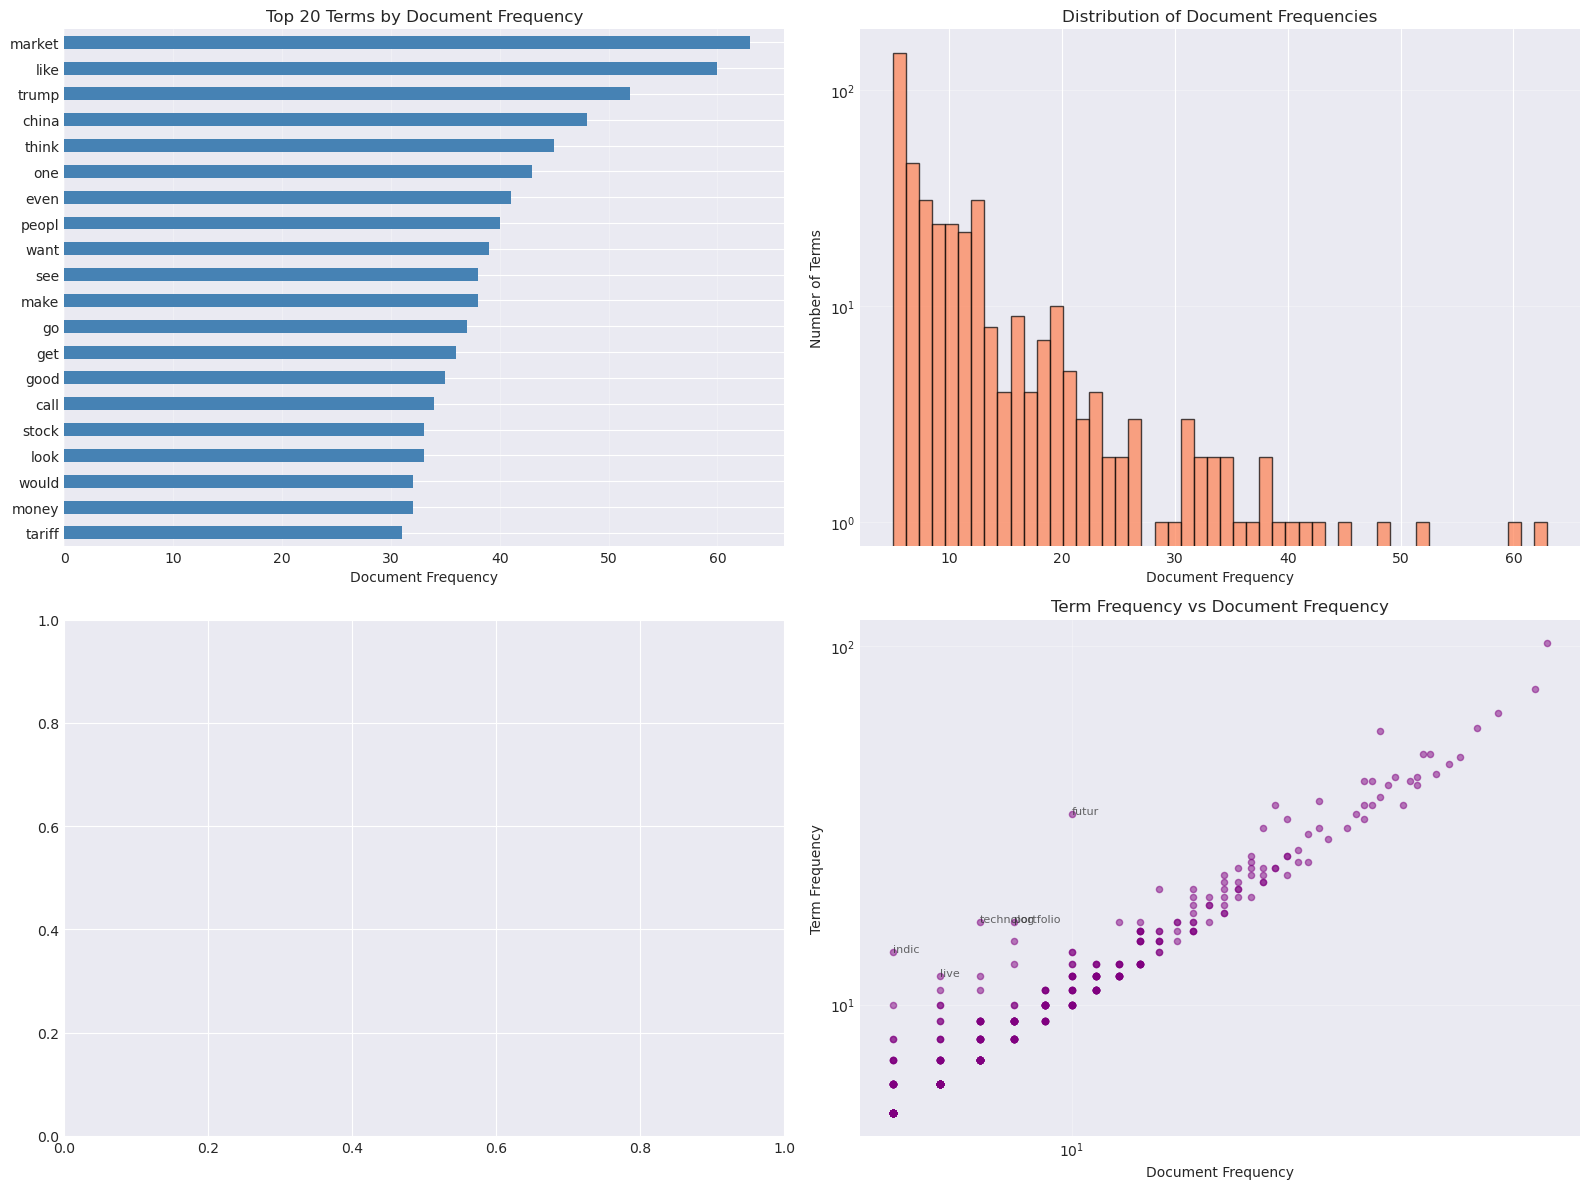


Document Frequency Statistics:
  Total unique terms: 412
  Mean doc frequency: 11.02
  Median doc frequency: 8.00
  Terms appearing in >50% docs: 0
  Terms appearing in <5 docs: 0
  Total patterns found: 0

Applying Dimensionality Reduction (this may take a while)...
  Computing PCA...
  Computing t-SNE...
  Skipping UMAP (not installed)


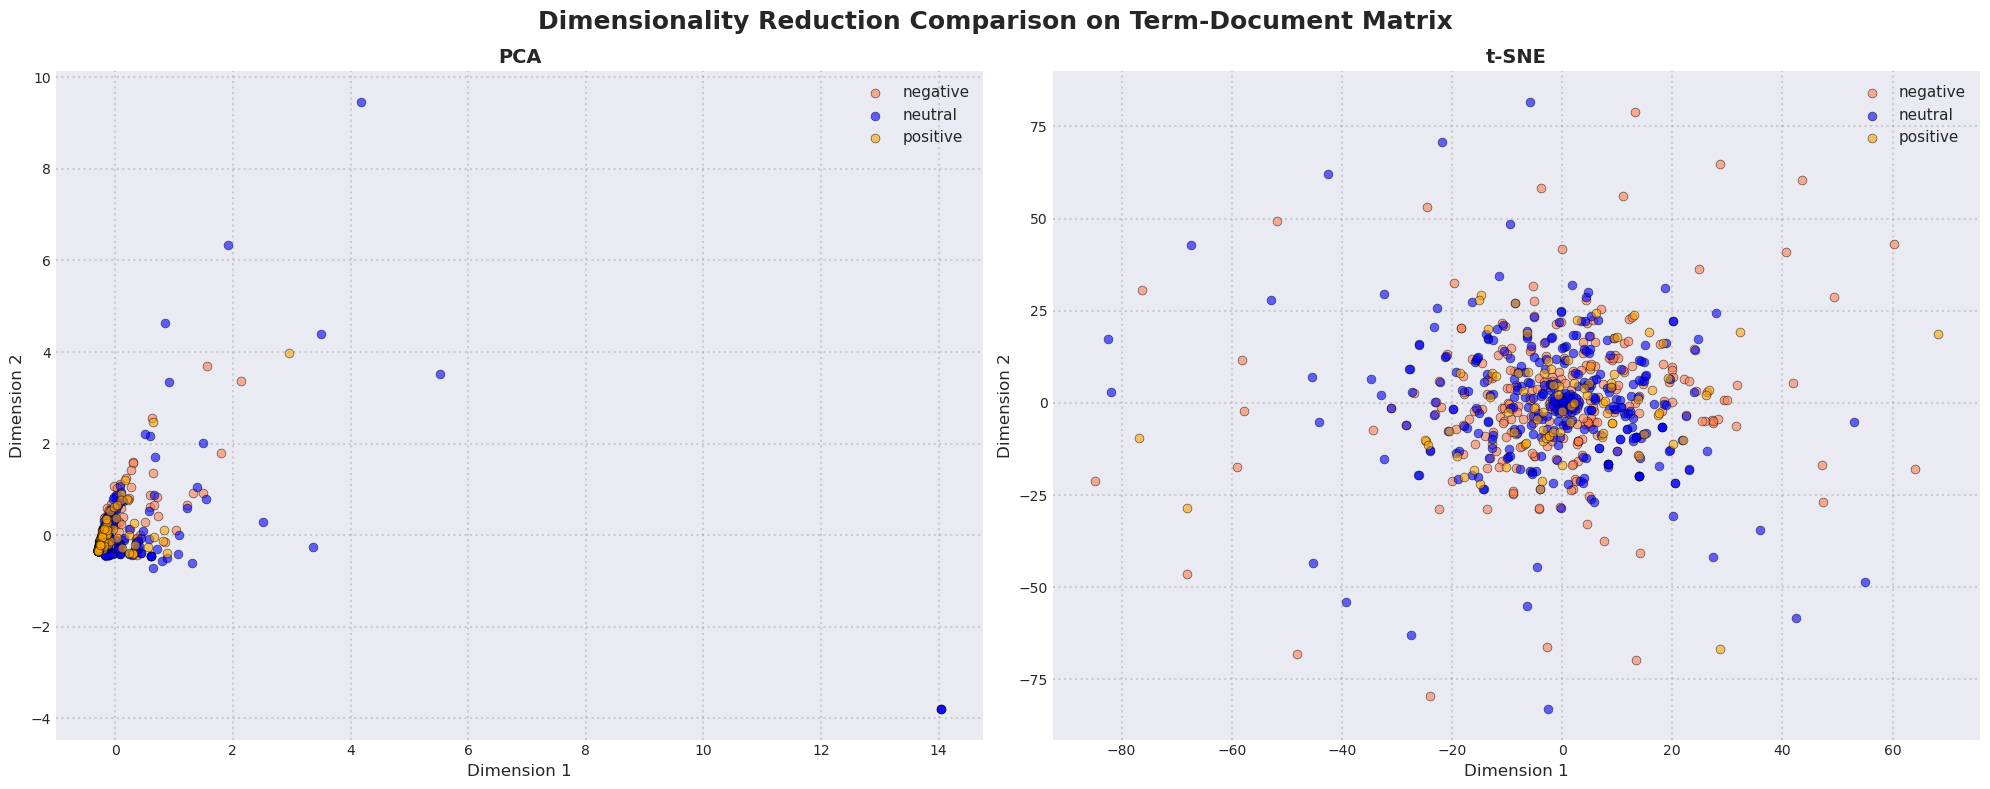

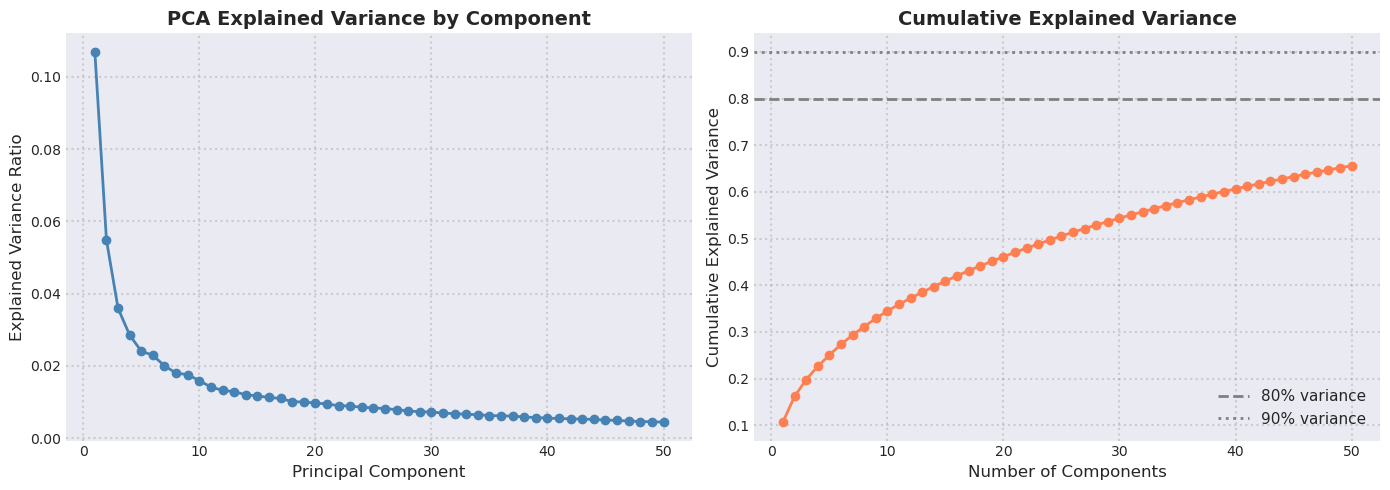


PCA Analysis:
  Components for 80% variance: 1
  Components for 90% variance: 1
  Total components analyzed: 50


<Figure size 640x480 with 0 Axes>

Training Char-TF-IDF + MNB...
  Accuracy: 0.5176, F1-Macro: 0.3720
              precision    recall  f1-score   support

    negative     0.4634    0.6032    0.5241        63
     neutral     0.5952    0.5882    0.5917        85
    positive     0.0000    0.0000    0.0000        22

    accuracy                         0.5176       170
   macro avg     0.3529    0.3971    0.3720       170
weighted avg     0.4694    0.5176    0.4901       170


Training Word-TF-IDF + BernoulliNB...
  Accuracy: 0.5471, F1-Macro: 0.3931
              precision    recall  f1-score   support

    negative     0.5000    0.7937    0.6135        63
     neutral     0.6418    0.5059    0.5658        85
    positive     0.0000    0.0000    0.0000        22

    accuracy                         0.5471       170
   macro avg     0.3806    0.4332    0.3931       170
weighted avg     0.5062    0.5471    0.5102       170


Training Hybrid + MNB...
  Accuracy: 0.6059, F1-Macro: 0.4548
              precision    recal

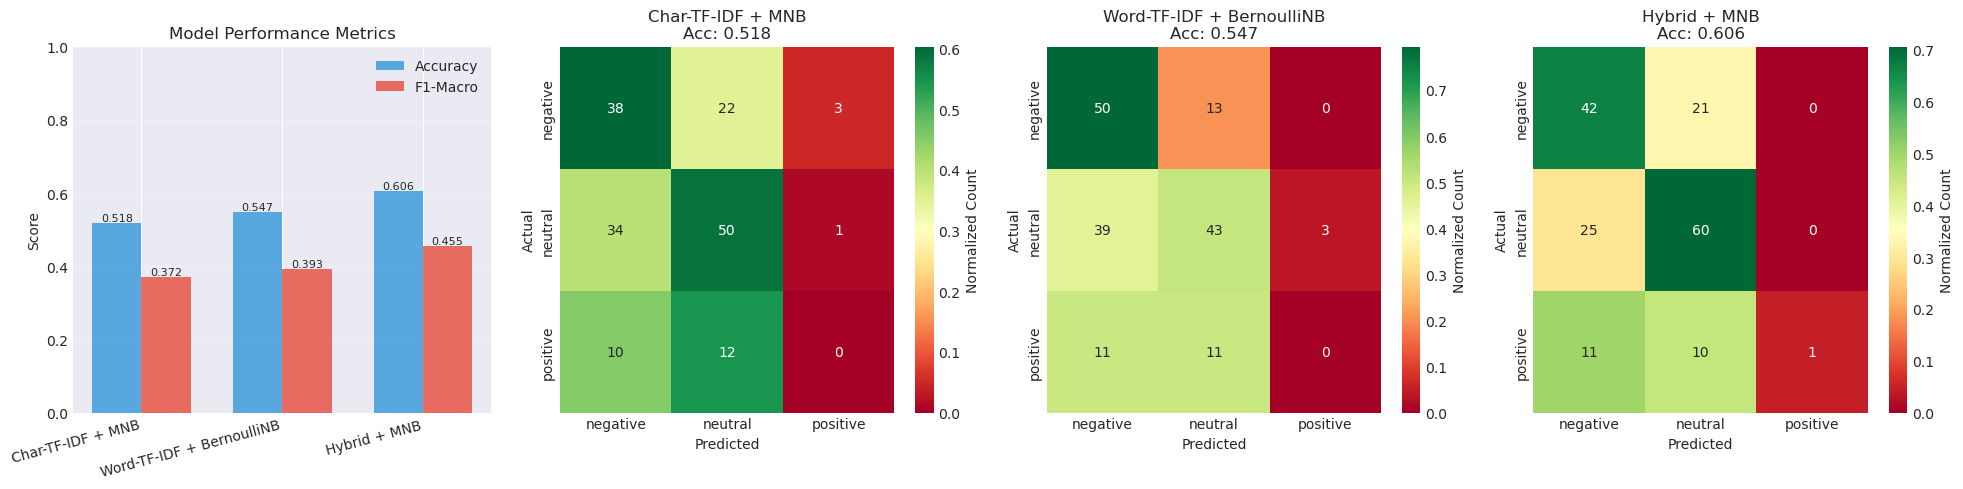


Pipeline Complete!


In [18]:
def main():
    """Execute pipeline"""
    print("=" * 60)
    print("Sentiment Analysis Pipeline - OOP Style")
    print("=" * 60 + "\n")
    
    pipeline = SentimentClassifier(random_state=42)
    
    # Load and prepare
    df = pipeline.load_data('./newdataset/Reddit-stock-sentiment.csv')
    pipeline.prepare_features(df)
    
    # Document frequency analysis
    pipeline.analyze_document_frequency()
    
    # Dimensionality reduction visualization
    pipeline.visualize_dimensionality_reduction()
    
    # Train and evaluate
    pipeline.train_models()
    
    # Visualize model results
    print("\nGenerating model performance visualizations...")
    pipeline.visualize_results()
    
    print("\n" + "=" * 60)
    print("Pipeline Complete!")
    print("=" * 60)


plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
main()

## For answering question 4:

Some inefficient parts in standard text sentiment preprocessing and pattern mining can affect both the accuracy and usefulness of analysis, especially for specific datasets like Reddit financial discussions. Several issues and improvement strategies are highlighted below.

### Inefficient Parts in Preprocessing  
- **Over-simplistic Text Cleaning:** Quickly applying lowercasing, stopword removal, and basic regex cleaning may strip valuable cues, such as emoticons, tickers, user mentions, dates, financial abbreviations, or even non-English sentiment signals, which can be meaningful in financial texts.  
- **Ignoring Domain-Specific Vocabulary:** Financial and Reddit-speak includes hashtags, ticker symbols, abbreviations (eg: company tickers), and slang that should not always be removed or normalized like generic stopwords; losing these can diminish performance for finance-oriented tasks.
- **Stemming Without Lemmatization:** Stemming (e.g., PorterStemmer) may distort word forms, causing loss of meaning. Lemmatization, which returns the word to its dictionary base, is more precise, especially important for financial documents where small variations are meaningful.
- **Unaddressed Class Imbalance:** If positive, neutral, and negative sentiments are unequally represented, models may be biased. Dataset balancing strategies (oversampling, synthetic generation) are needed for fair model training.
- **Pattern Mining Limitations:** Setting minimum support too high or pattern size too narrow in FP-Growth may miss important multiword patterns, while too low encourages noisy, non-informative combinations. Additionally, mining patterns without domain knowledge can add irrelevant features.

### Recommendations for Improving Preprocessing  
- **Custom, Domain-Specific Cleaning:**  
  - Design regex rules to keep ticker symbols, hashtags, relevant emojis, and Reddit-specific jargon.
  - Implement targeted stopword lists with financial terms preserved.
  - Normalize company names to ticker symbols for consistency.
- **Lemmatization Over Stemming:**  
  - Use lemmatization for better token quality, especially for sentiment or finance applications.
- **Class Balancing:**  
  - Apply random oversampling, undersampling, or SMOTE to ensure all sentiment classes are comparably represented during training.
- **Annotation Consistency:**  
  - Check that sentiment labels are correct and reflect the actual context; inconsistent labels lead to poor model generalization.

